In [1]:
#Packages

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

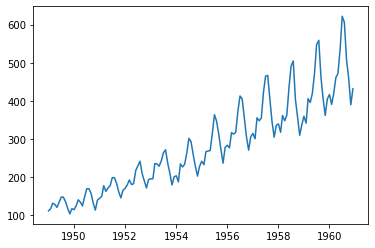

In [2]:
#Load data

data = pd.read_csv('airline-passengers.csv', header=0, index_col =0) 
data.index = pd.to_datetime(data.index, format='%Y-%m-%d') 
plt.plot(data) 

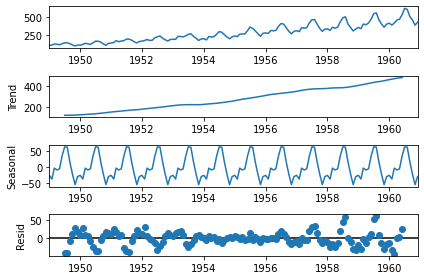

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose 

# Visualisation - Trend and seasonal effects
season_trend = seasonal_decompose(data) 
season_trend.plot() 
plt.show() 
 

[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Number of Passengers')]

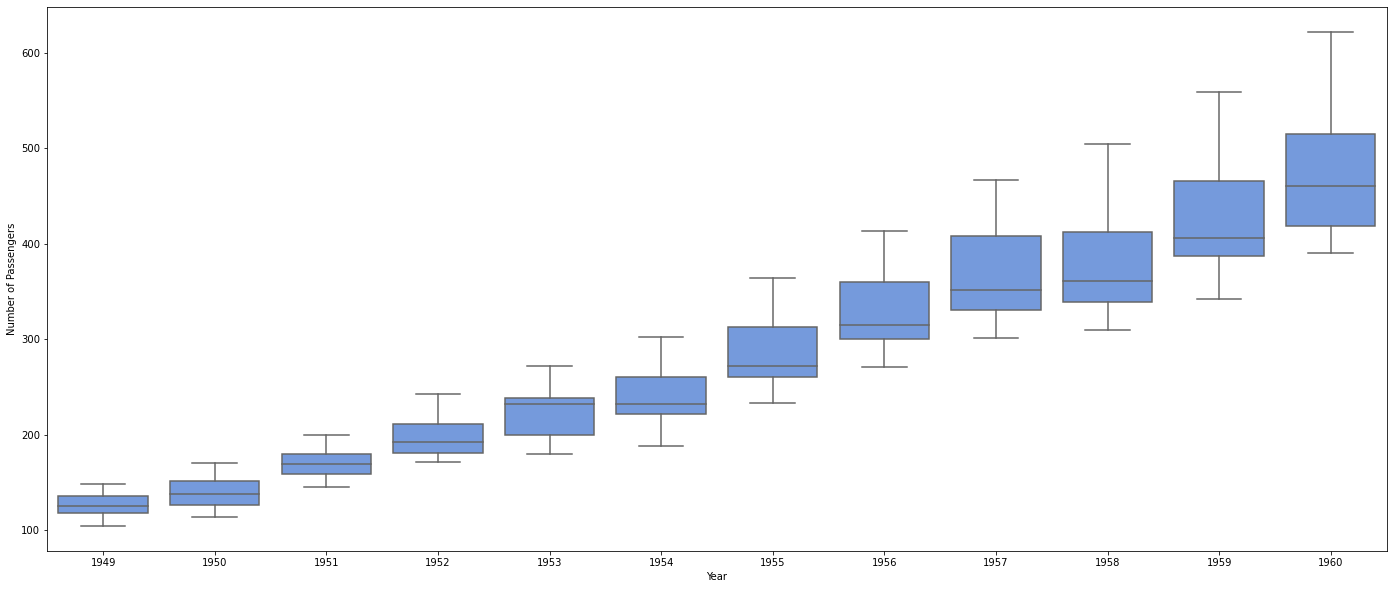

In [4]:
 
fig, ax = plt.subplots(figsize=(24,10)) 
sns.boxplot(x = data.index.year,y = data['Passengers'], ax = ax, color = "cornflowerblue") 
ax.set(xlabel='Year', ylabel='Number of Passengers') 

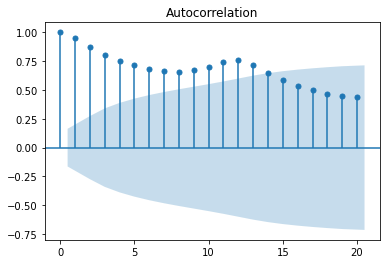

In [5]:
from statsmodels.graphics.tsaplots import plot_acf 

#check autocorrelation
plot_acf(data, lags= 20, alpha=0.05) 
plt.show() 

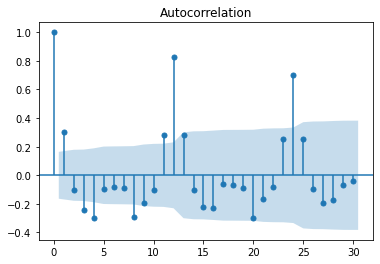

In [6]:
#ACF

df_diff = pd.DataFrame()
df_diff['Passengers'] = np.diff(data['Passengers'], n=1)

plot_acf(df_diff, lags= 30, alpha=0.05)
plt.show()

In [7]:
from statsmodels.stats.diagnostic import acorr_ljungbox

acorr_ljungbox(data, lags=[50], return_df=True)

,lb_stat,lb_pvalue
50,1936.400307,0.0
